In [1]:
import os
import numpy as np

import timeit
import glob

import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
plt.style.use("ggplot")
from skimage import io
from skimage.io import imread_collection
from PIL import Image
from sklearn.cluster import KMeans

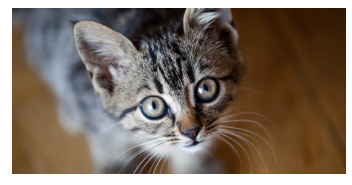

In [2]:
image = io.imread('img/Thinking-of-getting-a-cat.png')
labels = plt.axes(xticks=[], yticks=[])
labels.imshow(image);

(375, 500, 3)

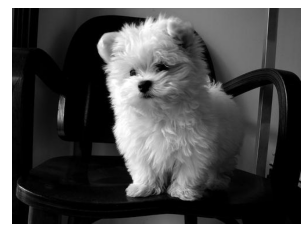

In [3]:
dog_image = imread_collection('img/dogimage/*.jpg')
dog_labels = plt.axes(xticks=[],yticks=[])
dog_labels.imshow(dog_image[0]);
dog_image[0].shape

(225, 300, 3)

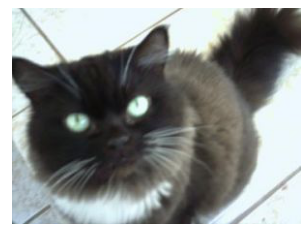

In [4]:
cat_image = imread_collection('img/catimage/*.jpg')
cat_labels = plt.axes(xticks=[],yticks=[])
cat_labels.imshow(cat_image[0]);
cat_image[0].shape

In [5]:
dog_start = timeit.default_timer()
dog_totalimagesize = 0
file_list = glob.glob(
    r'img/dogimage/*.jpg'
)
# Once all the paths are retrieved, read the images one by one in a loop.
my_list = []
for file in file_list:
    dog_image = io.imread(file)

    #Dimension of the original image
    rows = dog_image.shape[0]
    cols = dog_image.shape[1]

    #Flatten the image
    dog_image = dog_image.reshape(rows*cols, 3)

    #Implement k-means clustering to form k clusters
    kmeans = KMeans(n_clusters=10)
    kmeans.fit(dog_image)

    #Replace each pixel value with its nearby centroid
    compressed_image = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

    #Reshape the image to original dimension
    compressed_image = compressed_image.reshape(rows, cols, 3)

    #Save output image
    dog_totalimagesize = dog_totalimagesize + compressed_image.size
    name = file + '_Compresseddog'
    io.imsave('Compressed_'+ name +'.jpg', compressed_image)
    
dog_stop = timeit.default_timer()

In [6]:
print('Dog time: ', dog_stop - dog_start)
print('Processed size: ', dog_totalimagesize)
print('Ratio of time vs size: ', dog_totalimagesize / (dog_stop - dog_start))

Dog time:  670.6365014
Processed size:  59957052
Ratio of time vs size:  89403.20408274156


In [7]:
cat_start = timeit.default_timer()
cat_totalimagesize = 0
file_list = glob.glob(
    r'img/catimage/*.jpg'
)
# Once all the paths are retrieved, read the images one by one in a loop.
my_list = []
for file in file_list:
    cat_image = io.imread(file)

    #Dimension of the original image
    rows = cat_image.shape[0]
    cols = cat_image.shape[1]

    #Flatten the image
    cat_image = cat_image.reshape(rows*cols, 3)

    #Implement k-means clustering to form k clusters
    kmeans = KMeans(n_clusters=10)
    kmeans.fit(cat_image)

    #Replace each pixel value with its nearby centroid
    compressed_image = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

    #Reshape the image to original dimension
    compressed_image = compressed_image.reshape(rows, cols, 3)

    #Save output image
    cat_totalimagesize = cat_totalimagesize + compressed_image.size
    name = file + '_Compressedcat'
    io.imsave('Compressed_'+ name +'.jpg', compressed_image)
    
cat_stop = timeit.default_timer()

In [8]:
print('Cat time: ', cat_stop - cat_start)
print('Processed size: ', cat_totalimagesize)
print('Ratio of time vs size: ', cat_totalimagesize / (cat_stop - cat_start))

Cat time:  269.55493160000003
Processed size:  23927649
Ratio of time vs size:  88767.24628250132


# Reshape image into pixel data

In [9]:
image_data = (image).reshape(1200*600, 3)
image_data

array([[ 44,  49,  56],
       [ 34,  38,  44],
       [ 31,  33,  42],
       ...,
       [ 97,  64,  26],
       [ 93,  62,  22],
       [101,  68,  29]], dtype=uint8)

In [10]:
image_data # R G B for each 720000 pixels

array([[ 44,  49,  56],
       [ 34,  38,  44],
       [ 31,  33,  42],
       ...,
       [ 97,  64,  26],
       [ 93,  62,  22],
       [101,  68,  29]], dtype=uint8)

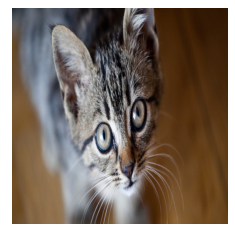

In [11]:
im = Image.open('img/Thinking-of-getting-a-cat.png')
size = (500, 500)
out = im.resize(size)
out.save('img/cat-image-resize.png')
resize_im = io.imread('img/cat-image-resize.png')
labels = plt.axes(xticks=[], yticks=[])
labels.imshow(resize_im)